In [21]:
#Cambiar a entorno virtual y cargar paquetes

import numpy as np
import pandas as pd
from pysyncon import Dataprep, Synth, AugSynth, PenalizedSynth, RobustSynth
from pysyncon.utils import PlaceboTest
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv(r'C:\Users\juanc\Dropbox\Investigacion\Visiting IEDIS UZ\Data\dataset_prueba.csv')
#data = pd.read_csv(r'C:\Users\34645\Desktop\Doctorado_II\Códigos_Python\IEDIS\Data\dataset_prueba.csv')
data['date'] = pd.to_datetime(data['date'])
# Describir serie temporal del movimiento en las provincias españolas 
data.set_index('date', inplace=True, drop=False)

In [23]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [24]:
datos = data[['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline', 'Edad mediana de la población (años)', 'Esperanza de vida al nacer (Años)', 'Número medio de hijos por mujer (Número)', 'Número total de hogares (Número)', 'Población residente (Personas)', 'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)', 'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)', 'Proporción de extranjeros sobre la población total (Porcentaje)', 'Proporción de hogares de una persona sobre el total de hogares (Porcentaje)', 'Proporción de nacidos en el extranjero sobre la población total (Porcentaje)', 'Proporción de nacionales sobre la población total (Porcentaje)', 'Proporción de nativos nacionales sobre la población total (Porcentaje)', 'Proporción de niños de 0-4 años en guarderías sobre la población de 0-4 años (Porcentaje)', 'Proporción de ocupados entre 20-64 años sobre la población activa (Porcentaje)', 'Proporción de población >=65 años (Porcentaje)', 'Proporción de población de  0-14 años (Porcentaje)', 'Proporción de población de 15-64 años (Porcentaje)', 'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 3 ó 4 (Porcentaje)', 'Proporción de población entre 25-64 años con máximo nivel de educación ISCED 5 ó 6 (Porcentaje)', 'Proporción de población entre 25-64 años con máximo nivel educación ISCED 0, 1 ó 2 (Porcentaje)', 'Renta neta media anual de los hogares (Euros)', 'Renta neta media anual por habitante (Euros)', 'Renta neta media anual por unidad de consumo (Euros)   ', 'Superficie total (Km2)', 'Tamaño medio de los hogares (Número)', 'Tasa bruta de mortalidad (Tanto por mil de personas)', 'Tasa bruta de natalidad (Tantos por mil de personas)', 'Tasa de actividad (Porcentaje)', 'Tasa de desempleo (Porcentaje)', 'Uso del suelo (%): Infraestructuras de transporte      ', 'Uso del suelo (%): Otras zonas artificiales      ', 'Uso del suelo (%): Tejido urbano residencial continuo', 'Uso del suelo (%): Tejido urbano residencial discontinuo', 'Uso del suelo (%): Unidades industriales, comerciales, públicas, militares y priva', 'Uso del suelo (%): Zonas agrícolas ', 'Uso del suelo (%): Zonas naturales      ', 'Uso del suelo (%): Zonas verdes urbanas, instalaciones deportivas y de ocio    ', 'Valor_Stringency', 'Valor_GovernmentResponseIndex', 'Valor_EconomicSupportIndex', 'Valor_Containment', 'trend_yearly']]
print ("# of variables in dataframe:", len(data.columns))
print  ("# of observations in dataframe:", len(data))

KeyError: "['Renta neta media anual por unidad de consumo (Euros)   '] not in index"

In [ ]:
np.round(datos.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
retail_and_recreation_percent_change_from_baseline,90582.00,-22.81,24.86,-97.00,100.00
grocery_and_pharmacy_percent_change_from_baseline,90529.00,3.47,26.53,-96.00,258.00
parks_percent_change_from_baseline,90417.00,14.35,53.59,-94.00,569.00
transit_stations_percent_change_from_baseline,90354.00,-15.69,27.78,-100.00,241.00
workplaces_percent_change_from_baseline,90582.00,-21.76,19.25,-92.00,72.00
residential_percent_change_from_baseline,90582.00,5.65,7.57,-12.00,48.00
Edad mediana de la población (años),90582.00,44.67,2.42,39.32,51.64
Esperanza de vida al nacer (Años),90582.00,83.51,0.91,79.33,84.73
Número medio de hijos por mujer (Número),90582.00,1.29,0.11,0.81,1.49
Número total de hogares (Número),90582.00,65.58,83.09,19.07,671.04


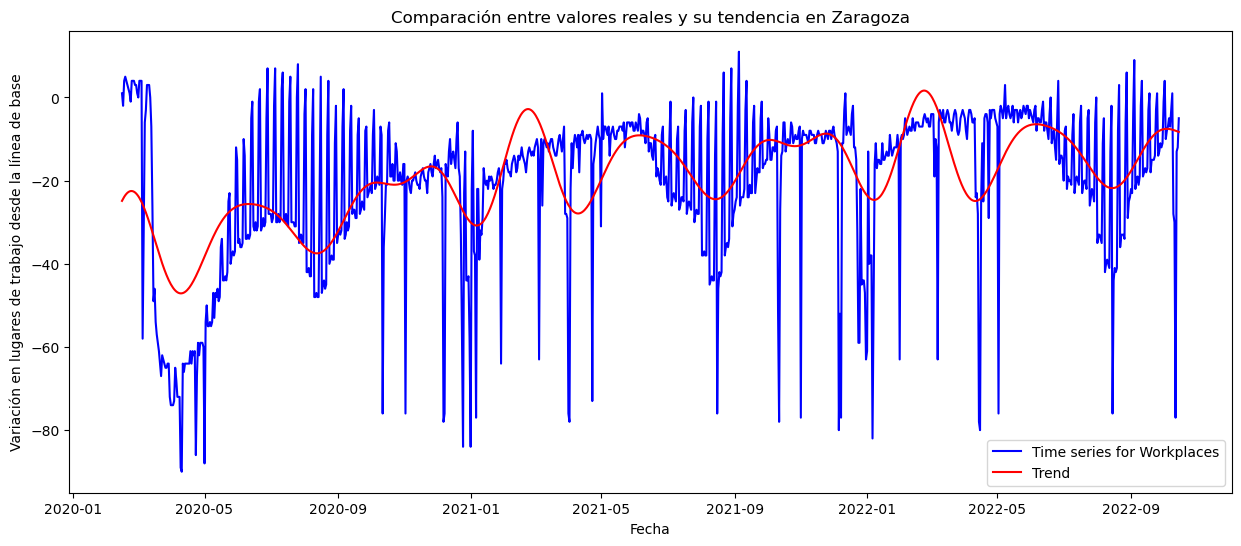

In [ ]:
# Filtra los datos solo para la ciudad de 'Zaragoza'
zaragoza_data = data[data['Municipios'] == 'Zaragoza']

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 6))

# # Grafica la serie temporal 'workplaces_percent_change_from_baseline' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['workplaces_percent_change_from_baseline'], label='Time series for Workplaces', color='blue')

# Grafica la serie temporal 'trend' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['trend_yearly'], label='Trend', color='red')

# Configura etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Variación en lugares de trabajo desde la línea de base')
plt.title('Comparación entre valores reales y su tendencia en Zaragoza')
plt.legend()

# Muestra el gráfico
plt.show()


In [ ]:
#Comenzamos análisis exxploratorio ))
print(data[data.date.duplicated()]['date'].count())

print('Fecha inicio del histórico: ', data.date.min())
print('Fecha fin del histórico: ', data.date.max())
print('Número total de días: ', data.date.nunique())

89608
Fecha inicio del histórico:  2020-02-15 00:00:00
Fecha fin del histórico:  2022-10-15 00:00:00
Número total de días:  974


In [ ]:
columnas = data.columns.tolist()
columnas

['date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline',
 'Comunidad',
 'Provincia',
 'CPRO',
 'Municipios',
 'Edad mediana de la población (años)',
 'Esperanza de vida al nacer (Años)',
 'Número medio de hijos por mujer (Número)',
 'Número total de hogares (Número)',
 'Población residente (Personas)',
 'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
 'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
 'Proporción de extranjeros sobre la población total (Porcentaje)',
 'Proporción de hogares de una persona sobre el total de hogares (Porcentaje)',
 'Proporción de nacidos en el extranjero sobre la población total (Porcentaje)',
 'Proporción de nacionales sobre la población total (Porcentaje)',
 'Proporción de nativos n

In [ ]:
# Crear un nuevo DataFrame para almacenar los valores promedio por ciudad
nuevo_df = pd.DataFrame()

#Antes de hacer esto, debemos introducir la estacinalidad semanal.

# Obtener una lista de ciudades únicas en el DataFrame
ciudades_unicas = data['Municipios'].unique()

for ciudad in ciudades_unicas:
    # Filtrar el DataFrame para una ciudad específica
    df_ciudad = data[data['Municipios'] == ciudad]
    
    # Agrupar por 'Fecha' y calcular el promedio de las variables numéricas
    df_ciudad_promedio = df_ciudad.groupby(pd.Grouper(key='date', freq='W-SUN')).mean().reset_index()
     # Agregar la columna 'periodo' que se incrementa con cada semana y se resetea para cada ciudad
    
    df_ciudad_promedio['periodo'] = range(1, len(df_ciudad_promedio) + 1)
    
    # Agregar la columna 'Ciudad' con el nombre de la ciudad
    df_ciudad_promedio['Municipios'] = ciudad
    
    # Agregar los datos de la ciudad al nuevo DataFrame
    nuevo_df = nuevo_df.append(df_ciudad_promedio)



# El nuevo DataFrame 'nuevo_df' contendrá los valores promedio por ciudad.

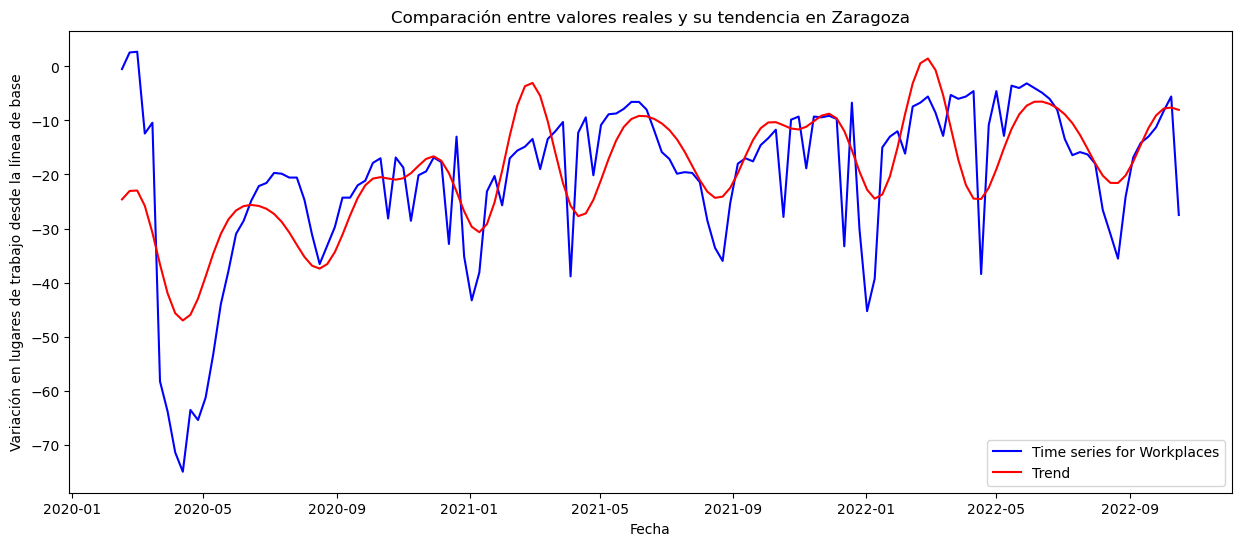

In [ ]:
# Filtra los datos solo para la ciudad de 'Zaragoza'
zaragoza_data = nuevo_df[nuevo_df['Municipios'] == 'Zaragoza']

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 6))

# # Grafica la serie temporal 'workplaces_percent_change_from_baseline' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['workplaces_percent_change_from_baseline'], label='Time series for Workplaces', color='blue')

# Grafica la serie temporal 'trend' para Zaragoza
plt.plot(zaragoza_data['date'], zaragoza_data['trend_yearly'], label='Trend', color='red')

# Configura etiquetas y leyenda
plt.xlabel('Fecha')
plt.ylabel('Variación en lugares de trabajo desde la línea de base')
plt.title('Comparación entre valores reales y su tendencia en Zaragoza')
plt.legend()

# Muestra el gráfico
plt.show()

In [ ]:
#Comenzamos análisis exxploratorio ))
print(nuevo_df[nuevo_df.date.duplicated()]['date'].count())

print('Fecha inicio del histórico: ', nuevo_df.date.min())
print('Fecha fin del histórico: ', nuevo_df.date.max())
print('Número total de semanas: ', nuevo_df.date.nunique())


12880
Fecha inicio del histórico:  2020-02-16 00:00:00
Fecha fin del histórico:  2022-10-16 00:00:00
Número total de semanas:  140


In [ ]:
np.round(nuevo_df.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
retail_and_recreation_percent_change_from_baseline,13020.00,-22.67,23.51,-93.29,68.29
grocery_and_pharmacy_percent_change_from_baseline,13020.00,3.44,20.23,-67.00,108.86
parks_percent_change_from_baseline,13013.00,14.47,50.77,-90.57,423.29
transit_stations_percent_change_from_baseline,13000.00,-15.54,26.62,-89.86,137.57
workplaces_percent_change_from_baseline,13020.00,-21.65,15.25,-78.71,30.29
...,...,...,...,...,...
multiplicative_terms_lower,13020.00,0.00,0.00,0.00,0.00
multiplicative_terms_upper,13020.00,0.00,0.00,0.00,0.00
yhat,13020.00,-21.74,11.57,-59.89,31.73
trend_yearly,13020.00,-20.66,10.99,-52.89,31.73


In [ ]:
#Prueba pysyncon
municipios_control = valores_sin_zaragoza = [municipio for municipio in data['Municipios'].unique() if municipio != "Zaragoza"]

dataprep = Dataprep(
    foo=data,
    predictors=[
         'Edad mediana de la población (años)',
         'Número medio de hijos por mujer (Número)',
         'Población residente (Personas)',
         'Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje)',
         'Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje)',
         'Proporción de extranjeros sobre la población total (Porcentaje)',
         'Proporción de población de 15-64 años (Porcentaje)',
         'Renta neta media anual por habitante (Euros)',
         'Tasa de desempleo (Porcentaje)',
    ],
    predictors_op="mean",
    time_predictors_prior=range(10, 127),
    special_predictors=[
        # ('Valor_Stringency', range(30,75), 'std'),
        # ('Valor_GovernmentResponseIndex',  range(30,75), 'std'), 
        # ('Valor_EconomicSupportIndex',  range(30,75), 'std'),
        # ('Valor_Containment',  range(30,75), 'std'),
    ],
    dependent="trend_yearly",
    unit_variable="Municipios",
    time_variable="Periodo",
    treatment_identifier='Zaragoza',
    controls_identifier=municipios_control,
    time_optimize_ssr=range(10, 127),
)

In [ ]:
#synth = Synth()
#synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")
 
#synth = PenalizedSynth()

synth = RobustSynth()
synth.fit(dataprep, lambda_=0.1, sv_count=2)


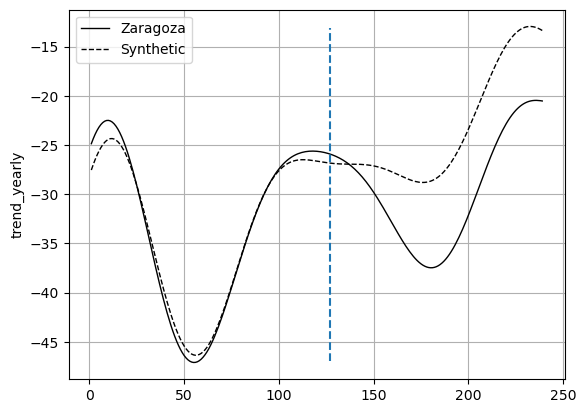

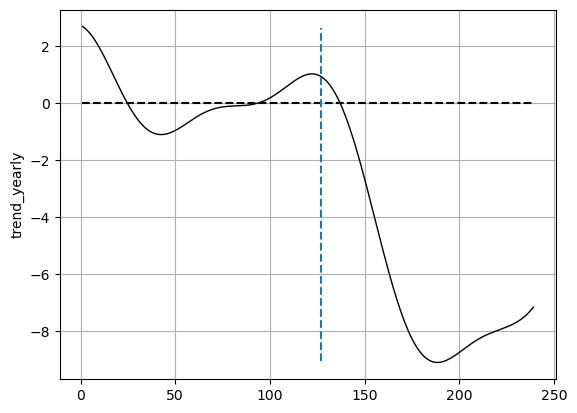

,treated,synthetic,sample mean
Edad mediana de la población (años),45.42,44.50,44.19
Número medio de hijos por mujer (Número),1.23,1.17,1.17
Población residente (Personas),681.88,145.22,145.71
Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje),10.26,7.92,9.07
Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje),83.31,83.21,82.14
Proporción de extranjeros sobre la población total (Porcentaje),11.79,10.95,10.77
Proporción de población de 15-64 años (Porcentaje),64.60,66.47,66.29
Renta neta media anual por habitante (Euros),14219.51,11315.90,12326.62
Tasa de desempleo (Porcentaje),11.65,18.60,17.49


In [25]:
synth.path_plot(time_period=range(1, 240), treatment_time=127)
synth.gaps_plot(time_period=range(1, 240), treatment_time=127)
synth.summary()
#synth.weights()


In [32]:
augsynth = AugSynth()
augsynth.fit(dataprep=dataprep, lambda_=0.1)

In [33]:
print(augsynth.weights())

Almería                    0.03
Algeciras                 -0.01
Chiclana de la Frontera   -0.01
Cádiz                      0.00
Jerez de la Frontera      -0.01
                           ... 
Elx/Elche                 -0.04
Torrevieja                 0.01
Gandia                     0.06
Paterna                    0.03
Torrent                    0.03
Name: weights, Length: 92, dtype: float64


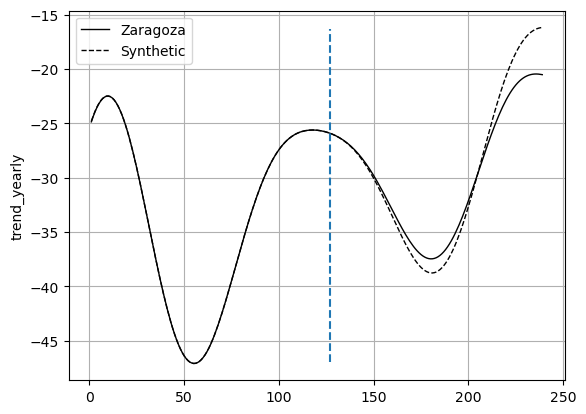

In [35]:
augsynth.path_plot(time_period=range(1, 240), treatment_time=127)

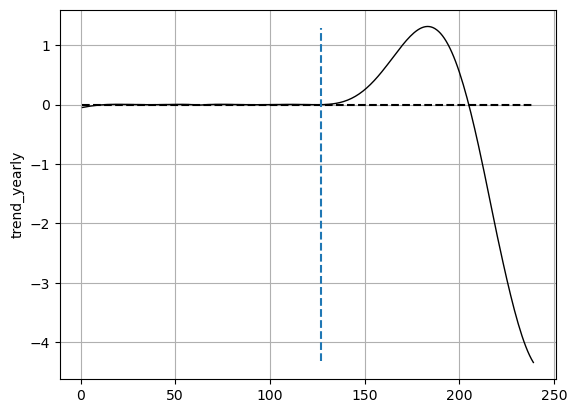

In [36]:
augsynth.gaps_plot(time_period=range(1, 240), treatment_time=127)

In [38]:
augsynth.summary()

,treated,synthetic,sample mean
Edad mediana de la población (años),45.42,45.42,44.19
Número medio de hijos por mujer (Número),1.23,1.23,1.17
Proporción de empleo en industria (NACE Rev.2 B-E) (Porcentaje),10.26,10.26,9.07
Proporción de empleo en servicios (NACE Rev.2 G-U) (Porcentaje),83.31,83.31,82.14
Proporción de extranjeros sobre la población total (Porcentaje),11.79,11.79,10.77
Proporción de población de 15-64 años (Porcentaje),64.60,64.60,66.29
Renta neta media anual por habitante (Euros),14219.51,14219.41,12326.62
Tasa de desempleo (Porcentaje),11.65,11.65,17.49
